# ANÁLISIS y VISUALIZACIÓN

#### 1. Importamos las librerias que nos seran utiles

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

#### 2. Definimos los parametros de nuestros gráficos

In [18]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

## HIPOTESIS I

### ATAQUES MENSUALES

#### 1. Importamos los datos generados en el modulo de limpieza

In [19]:
sdf1 = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/sdf')

In [5]:
ataques_mensuales = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/ataques_mensuales')

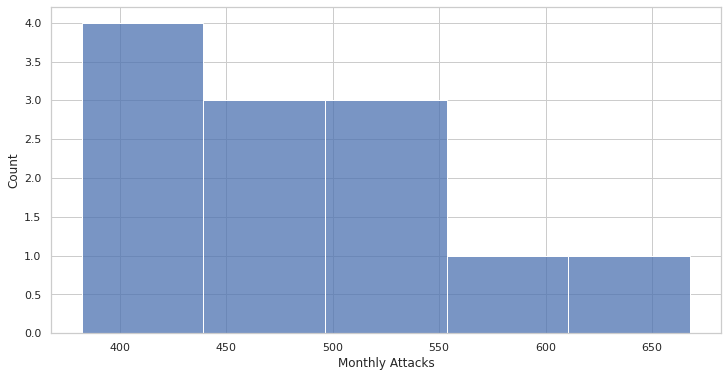

In [21]:
sns.histplot(x=ataques_mensuales['Monthly Attacks']);


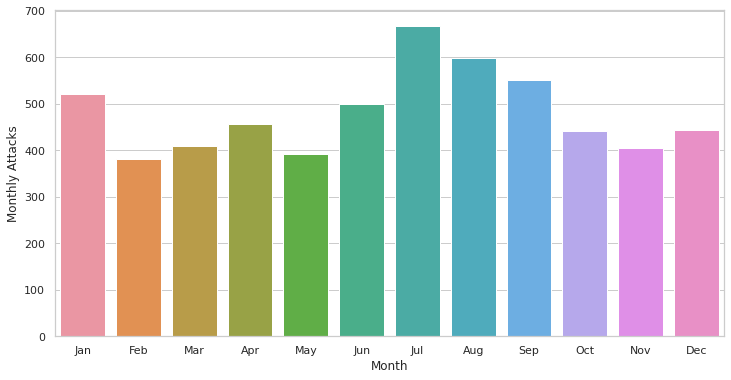

In [7]:
sns.barplot(x='Month', y='Monthly Attacks', data=ataques_mensuales);

### Podemos observar a partir del barplot anterior, que los meses que más cantidad de ataques registran son Julio, Agosto, Septiembre y Enero, que son los que corresponden al verano del hemisferio norte y sur respectivamente. Con lo cual podemos decir que generalmente los ataques ocurren con mas frecuencia en la temporada de verano. Por otro lado la mayoria de los ataques ocurren durante actividades acuaticas, como el surf, natación, pesca y buceo.

## HIPOTESIS II

### LAS ESPECIES MÁS LETALES

#### 1. Importamos los datos generados en el modulo de limpieza

In [8]:
letal2 = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/especies-letalidad')

#### 2. Definimos los parámetros de un bar plot para visualizar la cantidad de ataques letales en funcion de la especie.

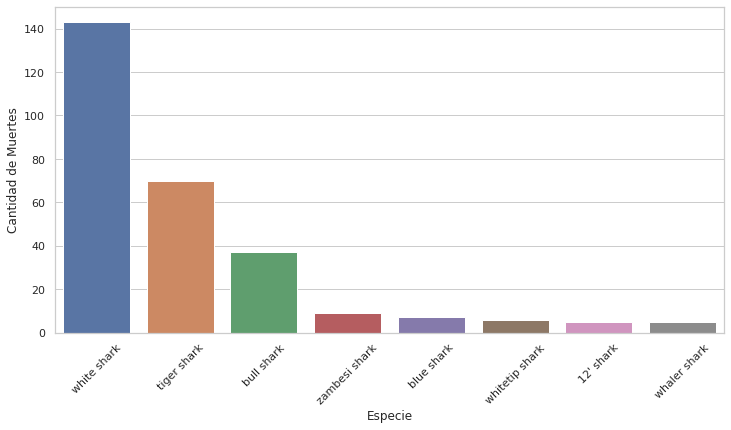

In [9]:
f = sns.barplot(x=letal2.Especie, y=letal2['Cantidad de Muertes'], data=letal2)
f.tick_params(axis='x', rotation=45);

In [10]:
ataques = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/Ataques-especies')

#### 3. Definimos los parámetros de un bar plot para visualizar la cantidad de ataques no letales en funcion de la especie.

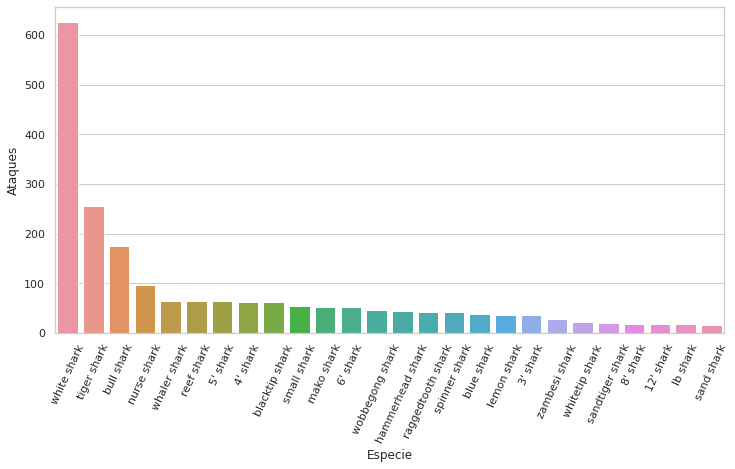

In [11]:
f = sns.barplot(x=ataques.Especie, y=ataques.Ataques, data=ataques)
f.tick_params(axis='x', rotation=65);

### En los gráficos de barra anteriores, podemos observar que los ataques relacionados al tiburon blanco, al tigre y al toro, son los que registran mayor cantidad de muertes. Sin embargo, otras especies como el tiburon nodriza (nurse), el cobrizo (whaler) o el de arrecife registran mayor cantidadde ataques no letales.

## HIPOTESIS III

### LAS ACTIVIDADES MÁS PELIGROSAS

#### 1. Importamos los datos generados en el modulo de limpieza

In [12]:
actividades = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/actividades-ataques')

In [13]:
actividades.set_index('Actividad', inplace=True)

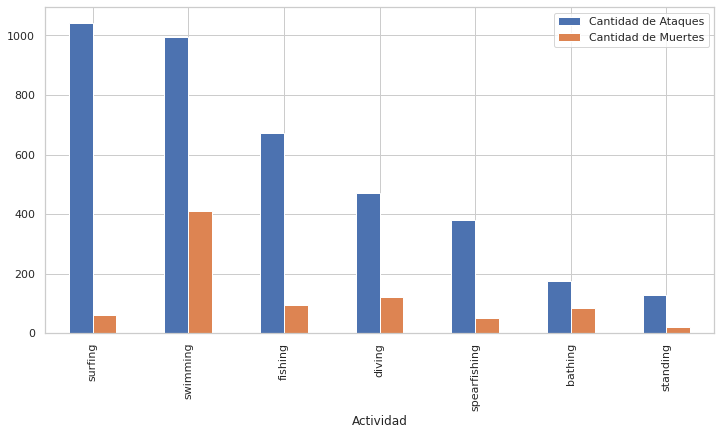

In [14]:
actividades.plot(kind="bar");

### Podemos observar que las actividades que poseen más registros de ataques, como 'swimming' y 'surfing', si bien registran una cantidad mayor de ataques no letales, la relación con los ataques letales es inversa, por ejemplo 'swimming' registra menos ataques no letales que 'surfing', sin embargo la cantidad de muertes es mucho mayor que en 'surfing'. Algo similar puede verse en 'fishsing' y 'diving'.